In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\Shobhan Sarkar\OneDrive\Desktop\Data Science Projects\World_cup_data\WorldCupPlayers.csv")

In [3]:
data.head(10)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
5,201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
7,201,1096,MEX,LUQUE Juan (MEX),S,0,Hilario LOPEZ,NaN,NaN
8,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Etienne MATTLER,NaN,NaN
9,201,1096,MEX,LUQUE Juan (MEX),S,0,Dionisio MEJIA,NaN,NaN


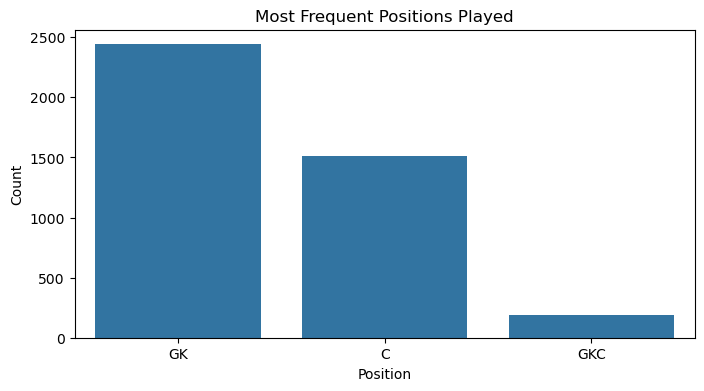

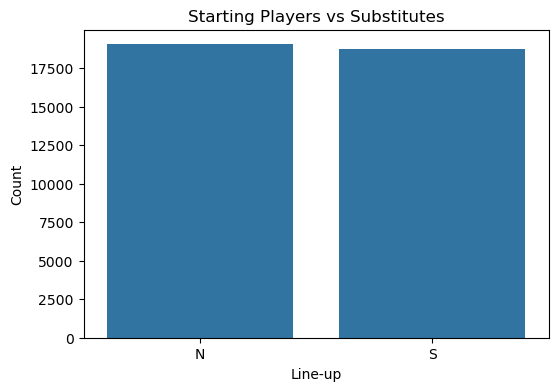

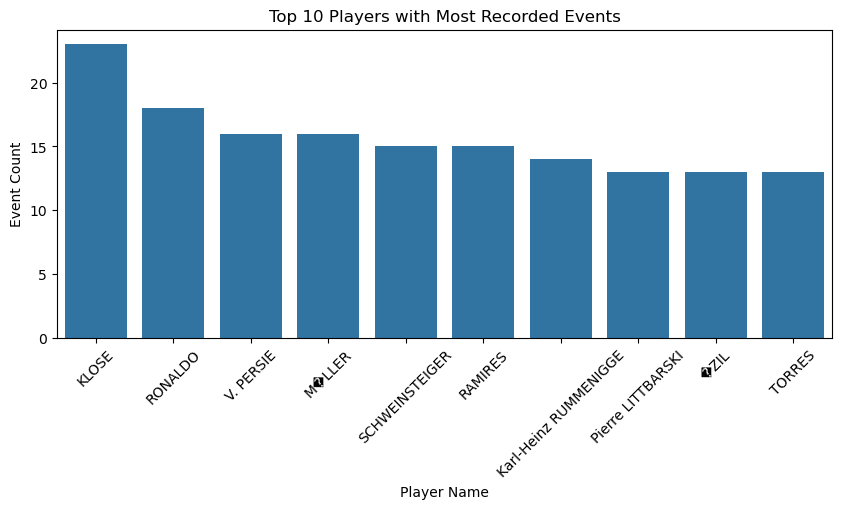

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Most frequent positions played by players
position_counts = data['Position'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=position_counts.index, y=position_counts.values)
plt.title('Most Frequent Positions Played')
plt.ylabel('Count')
plt.xlabel('Position')
plt.show()

# Distribution of starting players vs substitutes
lineup_counts = data['Line-up'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=lineup_counts.index, y=lineup_counts.values)
plt.title('Starting Players vs Substitutes')
plt.ylabel('Count')
plt.xlabel('Line-up')
plt.show()

# Players with the most recorded events (e.g., goals, cards, etc.)
event_counts = data['Player Name'][data['Event'].notna()].value_counts().head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=event_counts.index, y=event_counts.values)
plt.title('Top 10 Players with Most Recorded Events')
plt.ylabel('Event Count')
plt.xlabel('Player Name')
plt.xticks(rotation=45)
plt.show()


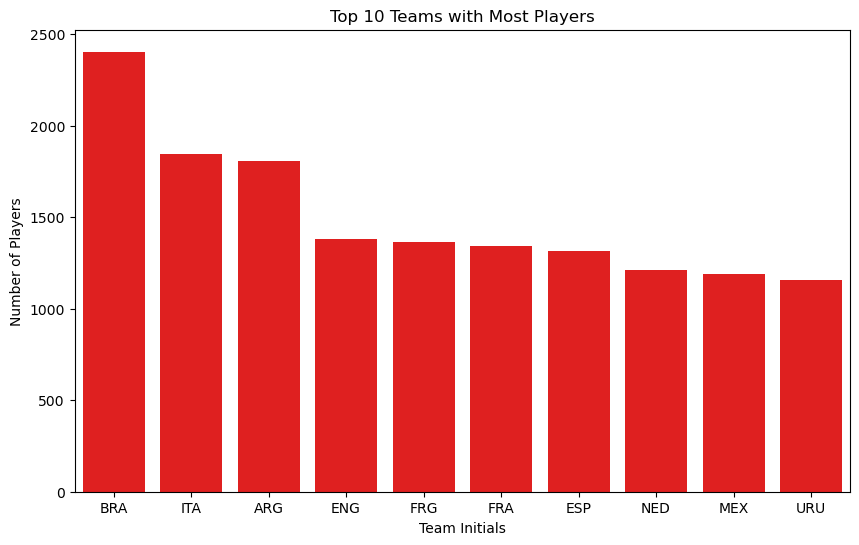

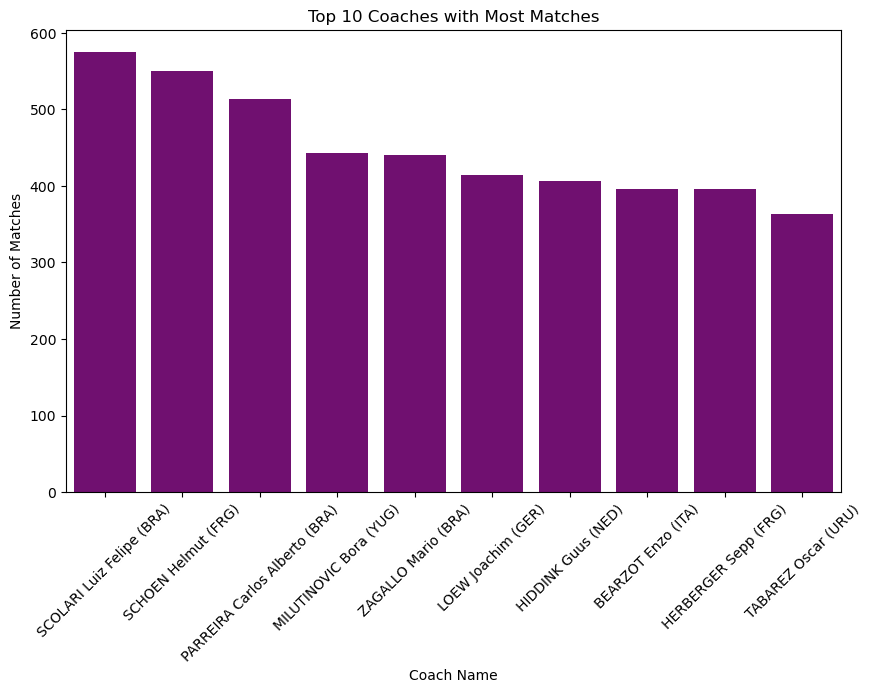

In [10]:
# Teams with the most players represented
team_counts = data['Team Initials'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=team_counts.index, y=team_counts.values,color='red')
plt.title('Top 10 Teams with Most Players')
plt.ylabel('Number of Players')
plt.xlabel('Team Initials')
plt.show()

# Coaches who coached the most matches
coach_counts = data['Coach Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=coach_counts.index, y=coach_counts.values,color='purple')
plt.title('Top 10 Coaches with Most Matches')
plt.ylabel('Number of Matches')
plt.xlabel('Coach Name')
plt.xticks(rotation=45)
plt.show()


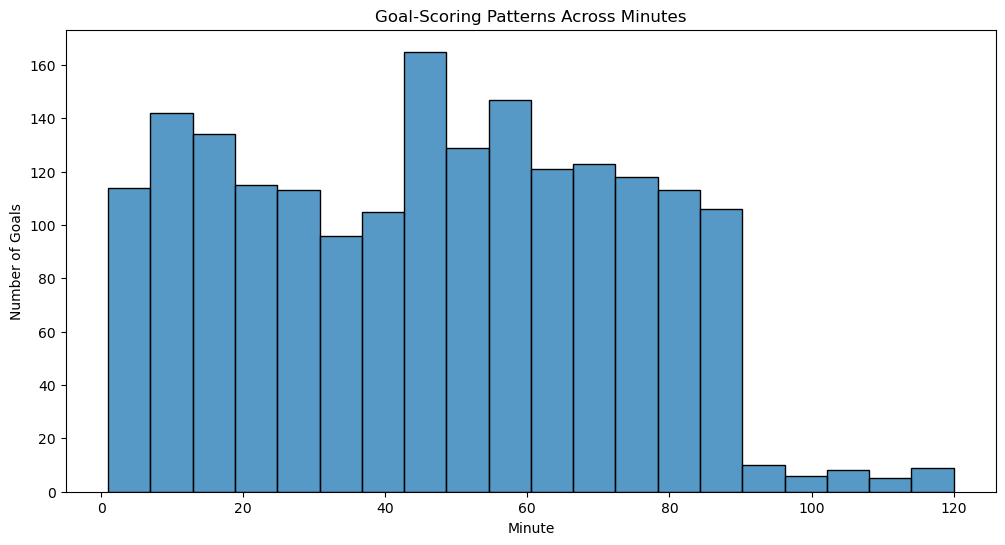

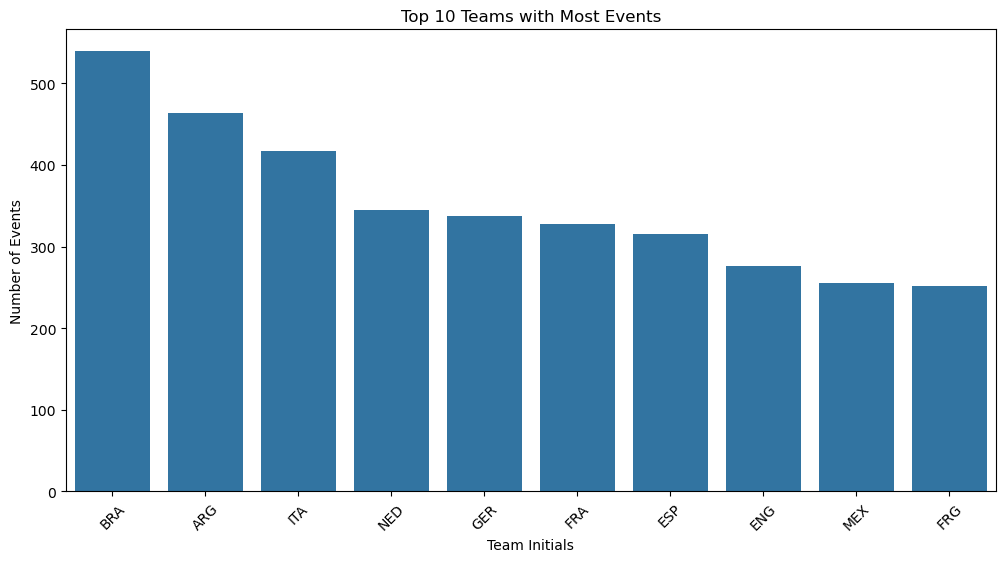

In [11]:
# Extracting minutes from events like 'G40'
data['Minute'] = data['Event'].str.extract(r'(\d+)').astype(float)

# Distribution of goals scored per minute
goal_minutes = data['Minute'][data['Event'].str.contains('G', na=False)]
plt.figure(figsize=(12, 6))
sns.histplot(goal_minutes, bins=20, kde=False)
plt.title('Goal-Scoring Patterns Across Minutes')
plt.ylabel('Number of Goals')
plt.xlabel('Minute')
plt.show()

# Event distribution across different teams
team_event_counts = data.groupby('Team Initials')['Event'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=team_event_counts.index, y=team_event_counts.values)
plt.title('Top 10 Teams with Most Events')
plt.ylabel('Number of Events')
plt.xlabel('Team Initials')
plt.xticks(rotation=45)
plt.show()


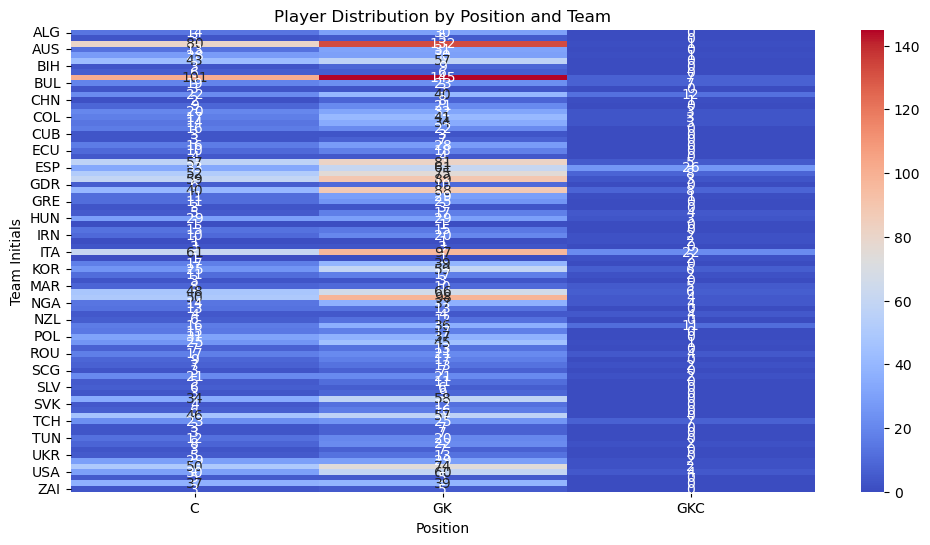

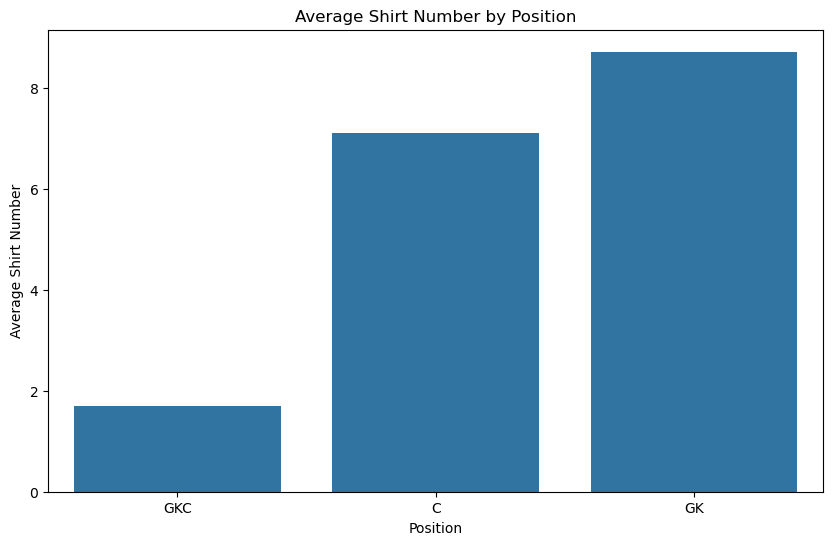

In [17]:
# Player distribution by position and team
position_team_distribution = data.groupby(['Team Initials', 'Position']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(position_team_distribution, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Player Distribution by Position and Team')
plt.ylabel('Team Initials')
plt.xlabel('Position')
plt.show()

# Average shirt number by position
avg_shirt_by_position = data.groupby('Position')['Shirt Number'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_shirt_by_position.index, y=avg_shirt_by_position.values)
plt.title('Average Shirt Number by Position')
plt.ylabel('Average Shirt Number')
plt.xlabel('Position')
plt.show()


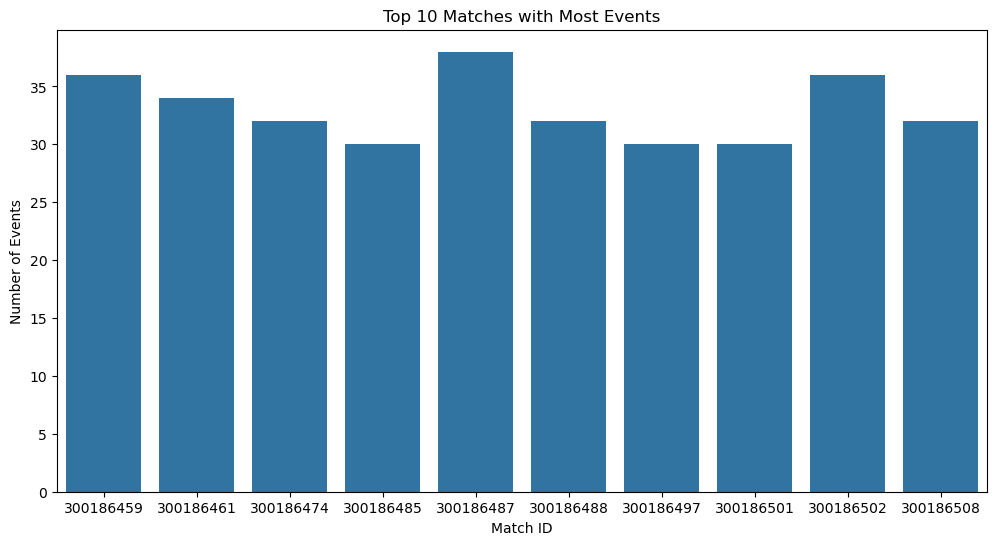

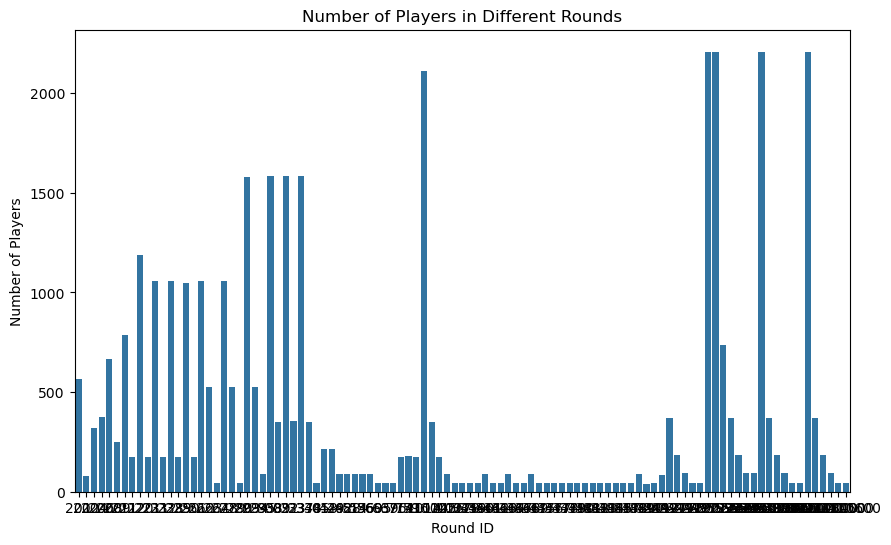

In [14]:
# Matches with the most events (goals, cards, etc.)
match_event_counts = data.groupby('MatchID')['Event'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=match_event_counts.index, y=match_event_counts.values)
plt.title('Top 10 Matches with Most Events')
plt.ylabel('Number of Events')
plt.xlabel('Match ID')
plt.show()

# Distribution of players across different rounds
round_player_counts = data.groupby('RoundID')['Player Name'].count()
plt.figure(figsize=(10, 6))
sns.barplot(x=round_player_counts.index, y=round_player_counts.values)
plt.title('Number of Players in Different Rounds')
plt.ylabel('Number of Players')
plt.xlabel('Round ID')
plt.show()


In [18]:
from scipy.stats import pearsonr

# Correlation between shirt number and number of goals
data_with_goals = data[data['Event'].str.contains('G', na=False)]
corr, p_value = pearsonr(data_with_goals['Shirt Number'], data_with_goals['Minute'].dropna())

print(f"Pearson correlation between Shirt Number and Goal Minute: {corr:.3f}, P-value: {p_value:.3f}")


Pearson correlation between Shirt Number and Goal Minute: -0.005, P-value: 0.843


In [19]:
data1 = pd.read_csv(r"C:\Users\Shobhan Sarkar\OneDrive\Desktop\Data Science Projects\World_cup_data\WorldCups.csv")

In [20]:
data1.head(10)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [24]:
data1.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

In [25]:
import pandas as pd

print(data1.describe())

# Summary of categorical columns
print(data1.describe(include=['object']))


              Year  GoalsScored  QualifiedTeams  MatchesPlayed
count    20.000000    20.000000       20.000000      20.000000
mean   1974.800000   118.950000       21.250000      41.800000
std      25.582889    32.972836        7.268352      17.218717
min    1930.000000    70.000000       13.000000      17.000000
25%    1957.000000    89.000000       16.000000      30.500000
50%    1976.000000   120.500000       16.000000      38.000000
75%    1995.000000   145.250000       26.000000      55.000000
max    2014.000000   171.000000       32.000000      64.000000
       Country  Winner Runners-Up    Third   Fourth Attendance
count       20      20         20       20       20         20
unique      15       9         10       14       16         20
top      Italy  Brazil  Argentina  Germany  Uruguay    590.549
freq         2       5          3        3        3          1


In [26]:
# Count the number of wins for each country
country_wins = data1['Winner'].value_counts()
print(country_wins)


Winner
Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
France        1
Spain         1
Germany       1
Name: count, dtype: int64


In [28]:
Mathesplayed = data1['MatchesPlayed'].value_counts()
print(Mathesplayed)

MatchesPlayed
64    5
52    4
32    3
18    2
38    2
17    1
22    1
26    1
35    1
Name: count, dtype: int64


In [31]:
top_goals = data1[['Country','Year', 'GoalsScored']].sort_values(by='GoalsScored', ascending=False).head(5)
print(top_goals)


        Country  Year  GoalsScored
19       Brazil  2014          171
15       France  1998          171
16  Korea/Japan  2002          161
17      Germany  2006          147
11        Spain  1982          146


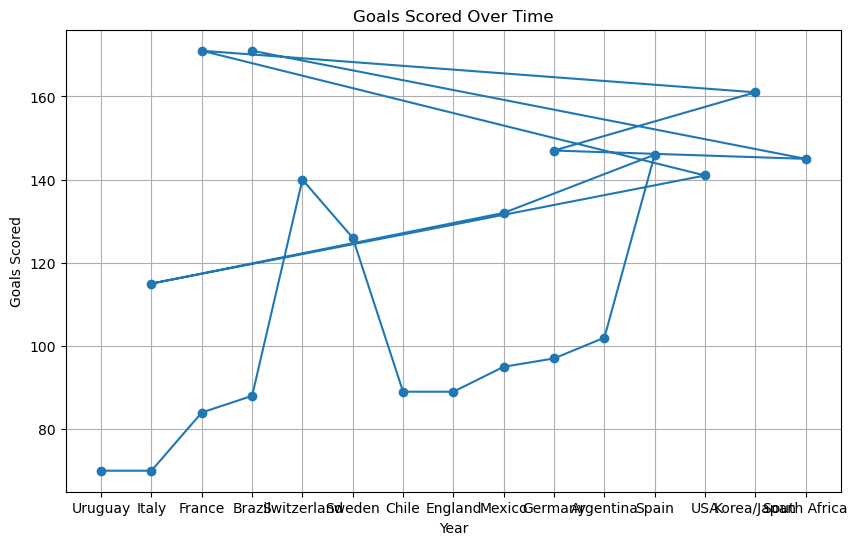

In [34]:
import matplotlib.pyplot as plt

# Line plot of Goals Scored over the years
plt.figure(figsize=(10, 6))
plt.plot(data1['Country'], data1['GoalsScored'], marker='o')
plt.title('Goals Scored Over Time')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.show()


In [37]:
runners_up = data1['Runners-Up'].value_counts()
print(runners_up)



Runners-Up
Argentina         3
Germany FR        3
Netherlands       3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
Sweden            1
Germany           1
France            1
Name: count, dtype: int64


In [38]:
winners_runners_up = data1[['Year', 'Winner', 'Runners-Up']]
print(winners_runners_up)


    Year      Winner      Runners-Up
0   1930     Uruguay       Argentina
1   1934       Italy  Czechoslovakia
2   1938       Italy         Hungary
3   1950     Uruguay          Brazil
4   1954  Germany FR         Hungary
5   1958      Brazil          Sweden
6   1962      Brazil  Czechoslovakia
7   1966     England      Germany FR
8   1970      Brazil           Italy
9   1974  Germany FR     Netherlands
10  1978   Argentina     Netherlands
11  1982       Italy      Germany FR
12  1986   Argentina      Germany FR
13  1990  Germany FR       Argentina
14  1994      Brazil           Italy
15  1998      France          Brazil
16  2002      Brazil         Germany
17  2006       Italy          France
18  2010       Spain     Netherlands
19  2014     Germany       Argentina


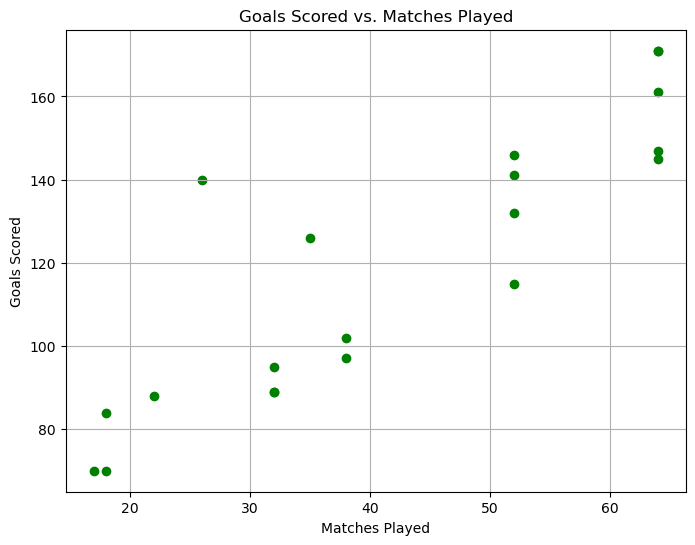

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(data1['MatchesPlayed'], data1['GoalsScored'], color='green')
plt.title('Goals Scored vs. Matches Played')
plt.xlabel('Matches Played')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.show()


In [40]:
highest_attendance = data1[['Year', 'Attendance']].sort_values(by='Attendance', ascending=False).head(5)
print(highest_attendance)


   Year Attendance
6  1962    893.172
5  1958    819.810
4  1954    768.607
0  1930    590.549
2  1938    375.700


In [41]:
country = 'Brazil'  # example country
performance = data1[(data1['Winner'] == country) | (data1['Runners-Up'] == country) | (data1['Third'] == country) | (data1['Fourth'] == country)]
print(performance[['Year', 'Winner', 'Runners-Up', 'Third', 'Fourth']])


    Year      Winner      Runners-Up        Third          Fourth
2   1938       Italy         Hungary       Brazil          Sweden
3   1950     Uruguay          Brazil       Sweden           Spain
5   1958      Brazil          Sweden       France      Germany FR
6   1962      Brazil  Czechoslovakia        Chile      Yugoslavia
8   1970      Brazil           Italy   Germany FR         Uruguay
9   1974  Germany FR     Netherlands       Poland          Brazil
10  1978   Argentina     Netherlands       Brazil           Italy
14  1994      Brazil           Italy       Sweden        Bulgaria
15  1998      France          Brazil      Croatia     Netherlands
16  2002      Brazil         Germany       Turkey  Korea Republic
19  2014     Germany       Argentina  Netherlands          Brazil


In [42]:
# Combine top four placements
top_teams = pd.concat([data1['Winner'], data1['Runners-Up'], data1['Third'], data1['Fourth']])
most_successful_teams = top_teams.value_counts().head(10)
print(most_successful_teams)


Brazil         11
Germany FR      8
Italy           8
Uruguay         5
France          5
Germany         5
Netherlands     5
Argentina       5
Sweden          4
Spain           2
Name: count, dtype: int64


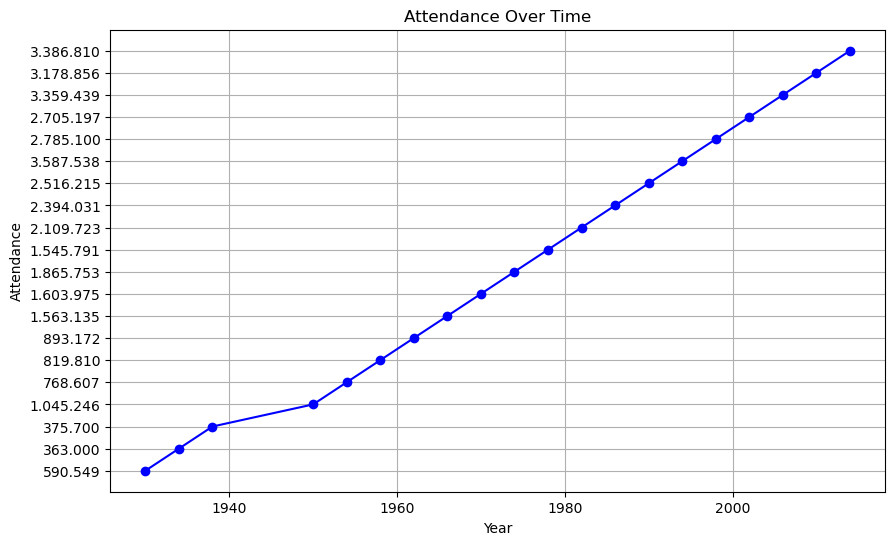

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(data1['Year'], data1['Attendance'], marker='o', color='blue')
plt.title('Attendance Over Time')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.grid(True)
plt.show()


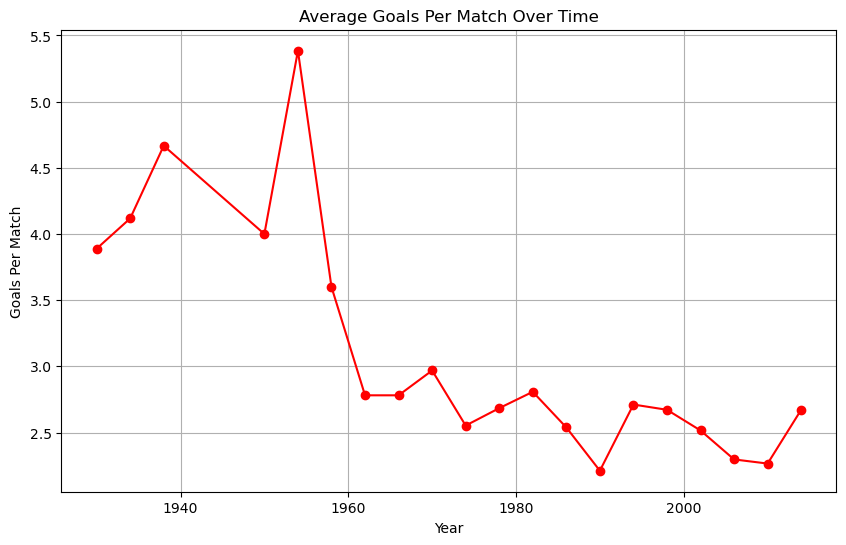

In [44]:
data1['GoalsPerMatch'] = data1['GoalsScored'] / data1['MatchesPlayed']
plt.figure(figsize=(10, 6))
plt.plot(data1['Year'], data1['GoalsPerMatch'], marker='o', color='red')
plt.title('Average Goals Per Match Over Time')
plt.xlabel('Year')
plt.ylabel('Goals Per Match')
plt.grid(True)
plt.show()


In [45]:
def find_streaks(team_column):
    return data1[team_column].value_counts().loc[lambda x: x > 1]

winning_streaks = find_streaks('Winner')
print(winning_streaks)


Winner
Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
Name: count, dtype: int64


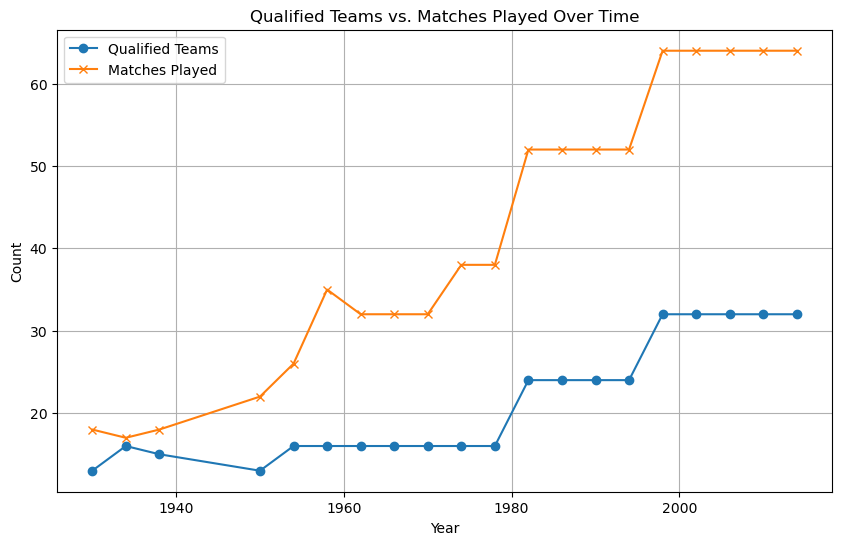

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(data1['Year'], data1['QualifiedTeams'], label='Qualified Teams', marker='o')
plt.plot(data1['Year'], data1['MatchesPlayed'], label='Matches Played', marker='x')
plt.title('Qualified Teams vs. Matches Played Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
# This assumes you have goal data broken down by country in the dataframe
top_goal_scorers = data1.groupby('Country')['GoalsScored'].sum().sort_values(ascending=False).head(10)
print(top_goal_scorers)


Country
Brazil          259
France          255
Germany         244
Mexico          227
Italy           185
Korea/Japan     161
Spain           146
South Africa    145
USA             141
Switzerland     140
Name: GoalsScored, dtype: int64


In [54]:
matchups = data1.groupby(['Winner', 'Runners-Up']).size().unstack(fill_value=0)
print(matchups)


Runners-Up  Argentina  Brazil  Czechoslovakia  France  Germany  Germany FR  \
Winner                                                                       
Argentina           0       0               0       0        0           1   
Brazil              0       0               1       0        1           0   
England             0       0               0       0        0           1   
France              0       1               0       0        0           0   
Germany             1       0               0       0        0           0   
Germany FR          1       0               0       0        0           0   
Italy               0       0               1       1        0           1   
Spain               0       0               0       0        0           0   
Uruguay             1       1               0       0        0           0   

Runners-Up  Hungary  Italy  Netherlands  Sweden  
Winner                                           
Argentina         0      0            1  